In [19]:
import mne
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
data = mne.io.read_raw_edf('/home/lawrence/Spindle/data/Pt1/Th_proj_Pt1_spindle.edf')
raw_data = data.get_data()
print(data.info)
print(raw_data.shape)

Extracting EDF parameters from /home/lawrence/Spindle/data/Pt1/Th_proj_Pt1_spindle.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
<Info | 8 non-empty values
 bads: []
 ch_names: FZ, CZ, PZ, LAN1-LAN2, LAN2-LAN3, LAN3-LAN4, LHA1-LHA2, ...
 chs: 81 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 1000.0 Hz
 meas_date: 2021-08-13 23:42:58 UTC
 nchan: 81
 projs: []
 sfreq: 2000.0 Hz
 subject_info: 3 items (dict)
>
(81, 2060000)


In [4]:
print(raw_data.shape[1]/ 2000)

1030.0


In [24]:
data_dir = '/home/lawrence/Spindle/data'
min_len = 1000000
max_len = 0
counter = 0
lim = 5999
all_window_lengths = []
all_labels = []
for patient in os.listdir(data_dir):
    df = pd.read_csv(os.path.join(data_dir, patient, 'annotation.csv'))
    window_lengths = df['end'] - df['start']
    all_window_lengths += list(window_lengths)
    if max_len < max(window_lengths):
        max_len = max(window_lengths)
    if min_len > min(window_lengths):
        min_len = min(window_lengths)
    counter += sum(window_lengths>lim)
    all_labels += list(df['label'])

print(min_len)
print(max_len)
print(counter)

1001
5999
0


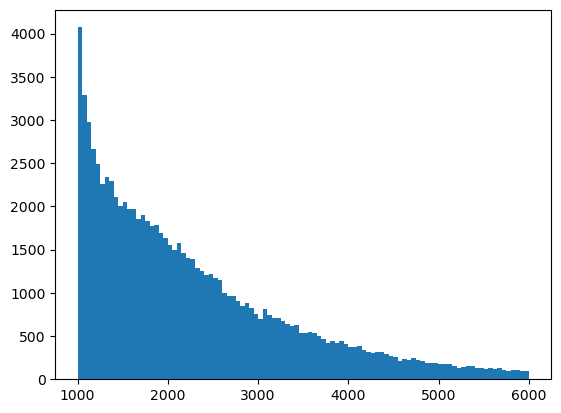

In [22]:
plt.hist(all_window_lengths, bins=100)
plt.show()

In [23]:
print(sum(np.array(all_window_lengths) > 3000)/len(all_window_lengths))

0.22276850239566617


In [26]:
print(sum(np.array(all_labels) == 'spindle')/len(all_labels))

0.16687721215018153


In [3]:
sample_rate = 2000
signal = raw_data[0]

fft_result = np.fft.fft(signal)
    
# Calculate the frequency values for each FFT bin
freq_values = np.fft.fftfreq(len(fft_result), 1.0 / sample_rate)

# Find the peak frequency and its magnitude
peak_magnitude = np.max(np.abs(fft_result))
peak_frequency = np.abs(freq_values[np.argmax(np.abs(fft_result))])

# Calculate the frequency range
frequency_range = (0, sample_rate / 2)  # Nyquist frequency

print(peak_frequency)
print(peak_magnitude)

0.0
53.77091130134934
